In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
#import openpyxl

In [3]:
# Raw Birth Data -> https://data.nber.org/linkpe/2013/LinkPE13Guide.pdf
birth_deaths_raw = pd.read_csv("./data/US_Birth_Data_Short.csv")

births_deaths_large = pd.read_csv("./data/US_Birth_Data_2013.csv")
mortality_rate_cig= pd.read_csv("./data/InfantMortallityRace.csv") 
#This dataset shows the infant mortality rate by race
birth_rate_df = pd.read_csv("./data/LinkedBirthData.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (326,329,332,335,338,366,367,368,369,370) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
birth_rate_df.head()

,Row Labels,Sum of Death Rate
0,American Indian or Alaska Native,7.70
1,Asian,3.81
2,Black or African American,10.50
3,More than one race,6.80
4,Native Hawaiian or Other Pacific Islander,8.39


In [ ]:
birth_rate_df.rename(columns={birth_rate_df.columns[0]:"Mothers Race"}, inplace = True)
birth_rate_df.rename(columns={birth_rate_df.columns[1]:"Infant Mortality"}, inplace = True)
df_droppedtotal=birth_rate_df.drop(birth_rate_df.index[[6]])
birth_rate_cl=df_droppedtotal.set_index("Mothers Race")
birth_rate_cl.plot.bar()

In [20]:
df_birth_data_copy=births_deaths_large.copy()

In [ ]:
df_birth_data_copy.head()

Payment Source
Number of prenatal visits
Birth weight
Cigarettes
Mothers race 
Mothers education
Aged


In [28]:
for i in df_birth_data_copy:
    print (i)

revision
laterec
DOB_YEAR
DOB_MONTH
DOB_TIME
DOB_DAY_OF_WEEK
OCCURENCE_TERRITORY
OCCURENCE_FIPS_COUNTY
OCCURENCE_COUNTY_POPULATION
BIRTH_PLACE_REVISED
BIRTH_PLACE
BIRTH_PLACE_RECODE
MOTHERS_AGE_IMPUTED
REPORTED_AGE_OF_MOTHER_FLAG
MOTHERS_AGE_RECODE_41
MOTHERS_AGE_RECODE_14
MOTHERS_AGE_RECODE_9
MOTHERS_BIRTH_COUNTRY
mrstatefips
mrcntyfips
rcnty_pop
rectype
restatus
mbrace
MOTHERS_RACE
mracerec
mraceimp
umhisp
mracehisp
mar_p
mar
mar_imp
MOTHERS_EDUCATION
fagerpt_flg
fagecomb
ufagecomb
fagerec11
fbrace
fracerec
ufhisp
fracehisp
FATHERS_EDUCATION
frace
priorterm
lbo_rec
tbo_rec
precare
precare_rec
uprevis
previs_rec
wtgain
wtgain_rec
dfpc_imp
wic
cig_0
cig_1
cig_2
cig_3
cig_rec
rf_diab
rf_gdiab
rf_phyper
rf_ghyper
rf_eclam
rf_ppterm
rf_ppoutc
rf_inftr
rf_fedrg
rf_artec
rf_cesar
rf_cesarn
urf_diab
urf_gen
urf_hydra
urf_hemo
urf_chyper
urf_phyper
urf_eclam
ip_gono
ip_syph
ip_chlam
ip_hepb
ip_hepc
op_cerv
op_tocol
op_ecvs
op_ecvf
uop_induc
uop_tocol
uop_ultra
uop_otherob
ol_ruptr
ol_precip
o

In [55]:
df_features=df_birth_data_copy[['BIRTH_PLACE','pay','payr','uprevis','aged','mracerec','MOTHERS_EDUCATION','cig_0','cig_1','cig_2','cig_3','cig_3','rf_eclam','wic','dbwt','sex']].copy()
df_features

,BIRTH_PLACE,pay,payr,uprevis,aged,mracerec,MOTHERS_EDUCATION,cig_0,cig_1,cig_2,cig_3,cig_3,rf_eclam,wic,dbwt,sex
0,1,NaN,NaN,8,265,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3543,F
1,1,NaN,NaN,9,256,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2551,F
2,1,NaN,NaN,5,236,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,793,M
3,1,NaN,NaN,1,126,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1105,F
4,1,NaN,NaN,7,186,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3171,M
5,1,NaN,NaN,4,242,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2664,M
6,1,NaN,NaN,6,196,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,915,M
7,1,NaN,NaN,10,103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3620,M
8,1,NaN,NaN,15,51,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3005,M
9,1,NaN,NaN,5,363,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2970,M


In [52]:
df_features['BIRTH_PLACE'].value_counts()#alot of births happenned in hospital
#1 hospital

1    22846
4      314
5       43
2       32
9        4
3        3
Name: BIRTH_PLACE, dtype: int64

In [56]:
df_features['payr'].value_counts()
#1 is medicaid
#private
#self pay
#other
#9 unknown

1.0    10990
2.0     7361
3.0     1109
4.0     1017
9.0      440
Name: payr, dtype: int64

In [72]:
df_features['cig_0'].value_counts()

0.0     16112
99.0     1391
20.0     1035
10.0      904
5.0       381
3.0       188
2.0       116
40.0      111
4.0       111
6.0       105
1.0       100
15.0       88
30.0       84
7.0        63
8.0        35
12.0       28
60.0       14
25.0       10
98.0        9
9.0         8
14.0        6
50.0        4
80.0        3
21.0        3
11.0        2
90.0        2
16.0        1
19.0        1
13.0        1
42.0        1
Name: cig_0, dtype: int64

In [58]:
#half the infants that died in this dataset were using wic
df_features['wic'].value_counts()

N    10558
Y     9212
U     1147
Name: wic, dtype: int64

In [60]:
#run a regression to see if the few that has hypertension passed
df_features['rf_eclam'].value_counts()

N    20616
U      191
Y      110
Name: rf_eclam, dtype: int64

In [69]:

#cig= ['cig_1','cig_2','cig_3']
df_features['cig_2'].value_counts()


0.0     17034
99.0     1415
10.0      836
5.0       393
20.0      389
3.0       190
2.0       133
4.0       108
6.0        95
1.0        77
7.0        64
8.0        50
15.0       48
40.0       20
12.0       17
30.0       14
98.0       10
9.0         7
60.0        3
13.0        3
14.0        3
50.0        2
11.0        2
16.0        1
25.0        1
45.0        1
33.0        1
Name: cig_2, dtype: int64

In [ ]:
#We see that most infant deaths happen on day 0
df_birth['aged'].value_counts()

In [79]:
#drop rows where all elements are missing
df_features = df_features.dropna(how='all')
#looks like no rows in this dataset have all nulls

In [80]:
df_features.shape

(23242, 16)

In [84]:
#df.dropna(subset=['name', 'toy'])
df=df_features.dropna(subset=['MOTHERS_EDUCATION'])

In [86]:
df.shape

(20917, 16)

TypeError: You must first set_array for mappable

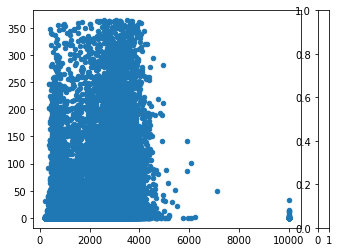

In [96]:
#looking at the data as a scatter plot

ax2 = df.plot.scatter(x='dbwt',
                      y='aged',
                      colormap='viridis')

In [93]:
#df_CDCData = births_deaths_large.copy()
fit = ols('aged ~ dbwt', data=df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   aged   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     3382.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:57:04   Log-Likelihood:            -1.1755e+05
No. Observations:               20917   AIC:                         2.351e+05
Df Residuals:                   20915   BIC:                         2.351e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4579      0.727     11.636      0.000       7.033       9.883
dbwt           0.0193      0.000     58.153      0.000       0.019       0.020
==============================================================================
Omnibus:                     8029.268   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33374.777
Skew:                           1.886   Prob(JB):                         0.00
Kurtosis:                       7.906   Cond. No.                     3.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:

#the coefficient states that the higher the mothers education the shorter amount of days your infant will live
df_CDCData = births_deaths_large.copy()
fit = ols('aged ~ C(MOTHERS_EDUCATION) + cig_0', data=df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   aged   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     35.79
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           1.69e-63
Time:                        19:53:26   Log-Likelihood:            -1.1896e+05
No. Observations:               20917   AIC:                         2.379e+05
Df Residuals:                   20907   BIC:                         2.380e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      42.7120      2.436     17.532      0.000      37.937      47.487
C(MOTHERS_EDUCATION)[T.2.0]     9.4230      2.736      3.444      0.001       4.061      14.785
C(MOTHERS_EDUCATION)[T.3.0]     1.1091      2.602      0.426      0.670      -3.991       6.209
C(MOTHERS_EDUCATION)[T.4.0]    -0.0095      2.655     -0.004      0.997      -5.214       5.195
C(MOTHERS_EDUCATION)[T.5.0]    -7.5514      3.107     -2.430      0.015     -13.642      -1.461
C(MOTHERS_EDUCATION)[T.6.0]   -10.3031      2.813     -3.662      0.000     -15.818      -4.789
C(MOTHERS_EDUCATION)[T.7.0]   -11.4520      3.331     -3.438      0.001     -17.980      -4.924
C(MOTHERS_EDUCATION)[T.8.0]   -10.9216      5.131     -2.128      0.033     -20.979      -0.864
C(MOTHERS_EDUCATION)[T.9.0]   -30.7581      3.368     -9.132      0.000     -37.360     -24.156
cig_0                           0.0491      0.020      2.462      0.014       0.010       0.088
==============================================================================
Omnibus:                     8787.608   Durbin-Watson:                   1.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33038.196
Skew:                           2.158   Prob(JB):                         0.00
Kurtosis:                       7.392   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
df_birth_data_copy.shape

(23242, 389)

In [ ]:
df_birth_data_copy.info()

In [7]:
df_birth_data_copy.describe()

,laterec,DOB_YEAR,DOB_MONTH,DOB_TIME,DOB_DAY_OF_WEEK,OCCURENCE_TERRITORY,OCCURENCE_FIPS_COUNTY,OCCURENCE_COUNTY_POPULATION,BIRTH_PLACE_REVISED,BIRTH_PLACE,...,stoccfipd,cntoccfipd,stresfipd,drcnty,cntyrfpd,cntrsppd,hospd,weekdayd,dthyr,dthmon
count,23242.0,23242.000000,23242.000000,20917.000000,23242.00000,0.0,0.0,0.0,20917.000000,23242.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,23242.000000,23242.000000,23242.0,23242.000000
mean,0.0,2012.881465,6.545650,1235.065975,4.02745,NaN,NaN,NaN,1.053067,1.050942,...,NaN,NaN,NaN,NaN,NaN,NaN,1.470958,4.037002,2013.0,6.500473
std,0.0,0.323248,3.417294,716.894224,1.91341,NaN,NaN,NaN,0.442479,0.401885,...,NaN,NaN,NaN,NaN,NaN,NaN,1.111311,1.991940,0.0,3.437872
min,0.0,2012.000000,1.000000,0.000000,1.00000,NaN,NaN,NaN,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2013.0,1.000000
25%,0.0,2013.000000,4.000000,729.000000,2.00000,NaN,NaN,NaN,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,2013.0,4.000000
50%,0.0,2013.000000,7.000000,1236.000000,4.00000,NaN,NaN,NaN,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000,2013.0,6.000000
75%,0.0,2013.000000,9.000000,1755.000000,6.00000,NaN,NaN,NaN,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,6.000000,2013.0,9.000000
max,0.0,2013.000000,12.000000,9999.000000,7.00000,NaN,NaN,NaN,9.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,7.000000,2013.0,12.000000


In [54]:
#finding all the columns where it is all null
count_number_of_na=df_birth_data_copy.isna().sum()
all_rows_na=count_number_of_na[count_number_of_na==23242]
all_rows_na
all_rows_na.count()
#I see that all locations are null
#There are 51 rows that are null

51

In [9]:
#we are going to drop all null values
df_birth_data_all_null_drop=df_birth_data_copy.dropna(axis=1, how='all')
df_birth=df_birth_data_all_null_drop

In [10]:
#age in which infant dies is our dependant variable
df_birth['aged'].describe()

count    23242.000000
mean        41.845581
std         72.673323
min          0.000000
25%          0.000000
50%          3.000000
75%         53.000000
max        364.000000
Name: aged, dtype: float64

In [ ]:
#drop na's for mothers race and education for our regression model


In [45]:
#we see that majority of the deaths were 0, which I assumed were infants died at birth
df_birth['aged'].mode()

0    0
dtype: int64

In [56]:
#Out of 23242 rows there are only 2123 mothers race with this column, we need to use another column 
df_birth['MOTHERS_RACE'].count()

2123

In [63]:
#print all columns that have race
race = [col for col in df_birth.columns if 'race' in col]
#print(list(df_birth.columns))
print(race)


['mbrace', 'mracerec', 'mraceimp', 'mracehisp', 'fbrace', 'fracerec', 'fracehisp', 'frace']


In [77]:
#Look at the values and count the number of values in each column that has race.


for i in race:
    print(df_birth[i].value_counts())

1.0     13425
2.0      6005
3.0       262
4.0       225
10.0      220
21.0      194
22.0      193
6.0       143
5.0       126
24.0       82
9.0        72
8.0        48
23.0       34
14.0       30
7.0        28
13.0       17
12.0        8
11.0        7
Name: mbrace, dtype: int64
1    15013
2     6809
4     1071
3      349
Name: mracerec, dtype: int64
1.0    1438
2.0      38
Name: mraceimp, dtype: int64
6    10689
7     6438
1     2632
8     1268
5      795
4      559
9      402
2      402
3       57
Name: mracehisp, dtype: int64
1.0     9770
99.0    6517
2.0     3648
4.0      195
10.0     169
21.0     155
3.0      130
5.0       98
22.0      96
6.0       91
24.0      75
9.0       57
23.0      42
8.0       29
14.0      17
13.0      12
11.0       8
7.0        8
12.0       2
Name: fbrace, dtype: int64
1    10958
9     7121
2     4144
4      809
3      210
Name: fracerec, dtype: int64
6    8323
9    6096
7    4010
1    2246
8    1140
5     620
4     429
2     324
3      54
Name: fracehisp, d

In [74]:
#count the number of 0 in this column. 0 stands for mothers who did not disclose
df_birth['mracerec'].value_counts()

1    15013
2     6809
4     1071
3      349
Name: mracerec, dtype: int64

In [ ]:
#It doesn't make sense to use this column so
df_birth['MOTHERS_RACE'].value_counts()

At this point we just need to choose a columnm which will be 'mracerec'

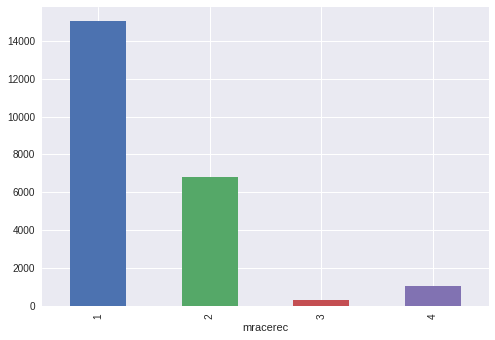

In [79]:
#The data mostly has records for white women, assuming there was an equal amount our data will make more sense. 
#we need to use weighted average moving forward
groupby_meducation=df_birth_data_copy.groupby(df_birth_data_copy['mracerec'])
number_of_deaths_per_education=groupby_meducation['dthyr'].count()#
number_of_deaths_per_education.plot.bar()



In [83]:
#Looks like we have the mothers education for a good amount of the data. I think I should get rid of all the nulls values in mothers education  

df_birth['MOTHERS_EDUCATION'].value_counts()


3.0    6087
4.0    4553
2.0    3289
6.0    2562
5.0    1368
7.0     987
9.0     960
1.0     861
8.0     250
Name: MOTHERS_EDUCATION, dtype: int64

In [84]:
#only keep values where mothers education is not null
df_birth = df_birth[df_birth['MOTHERS_EDUCATION'].notna()]

In [86]:
#What is the weighted average of infant deaths per race

(20917, 338)

In [87]:
#Checking correlation between the mothers education level and the age in which an infant dies 
df_birth['MOTHERS_EDUCATION'].corr(df_birth['aged'])

-0.11295818300758757

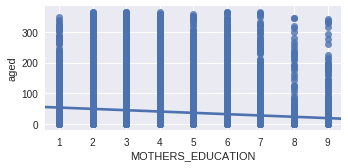

In [88]:
#a regression showing how mothers education correlates with the age in which a infant dies
sns.pairplot(df_birth,x_vars=['MOTHERS_EDUCATION'],y_vars=['aged'], aspect=2.0, kind='reg')

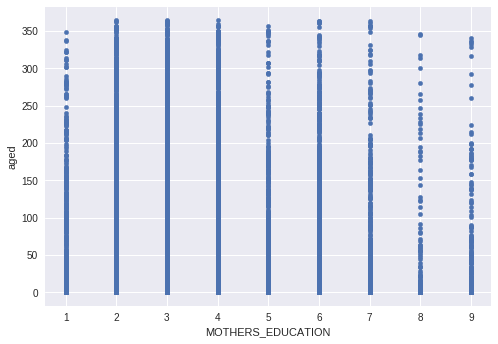

In [89]:
plt.style.use('seaborn')

df_birth.plot(x='MOTHERS_EDUCATION', y='aged', kind='scatter')
plt.show()


In [92]:
#A new regression y= mx +b 

df1_birth = df_birth.dropna(subset=['MOTHERS_EDUCATION', 'aged'])
X = df1_birth['MOTHERS_EDUCATION']
y = df1_birth['aged']



In [93]:
reg1 = sm.OLS(endog=df1_birth['aged'], exog=df1_birth['MOTHERS_EDUCATION'],
    missing='drop')
type(reg1)



statsmodels.regression.linear_model.OLS

In [ ]:
results = reg1.fit()
type(results)


In [ ]:
print(results.summary())

In [ ]:
#my hypthosis is that is there will be some type of normal distribution as the education of a mother goes up - 
#Number of death per mothers education
groupby_meducation=df_birth_data_copy.groupby(df_birth_data_copy['MOTHERS_EDUCATION'])
number_of_deaths_per_education=groupby_meducation['dthyr'].count()#
number_of_deaths_per_education.plot.bar()

#number_of_death_per_meducation= groupby_hour['MOTHERS_EDUCATION'].count()

In [ ]:
#This graph shows us the number of deaths based on whether the father is present or not 

groupby_father_present=df_birth_data_copy.groupby(df_birth_data_copy['mar_p'])
father_present=groupby_father_present['mar_p'].count()#
father_present.plot.bar()

In [ ]:
#Average 
groupby_average_age= df_birth_data_copy.groupby(df_birth_data_copy['MOTHERS_EDUCATION'])
average_age= groupby_average_age['aged'].mean()
average_age.plot.bar()

In [ ]:
groupby_meducation=df_birth_data_copy.groupby(df_birth_data_copy['MOTHERS_RACE'])
number_of_deaths_per_education=groupby_meducation['dthyr'].count()#
number_of_deaths_per_education.plot.bar()


In [ ]:
boxplot = df_birth_data_copy.boxplot(column=['MOTHERS_EDUCATION','aged'])

In [ ]:
#Renaming the columns to be more readable
births_deaths_large.rename(columns={births_deaths_large.columns[80]:'Chlamydia'}, inplace = True)
birth_data_copy.columns[80]

In [ ]:
#The column names for the 80 column names I need to change
births_deaths_large.columns[81:160]

In [ ]:
# count=0
# for i in range(80,160):
#     print(i)
#     count= count+1
# strcount=str(count)
# print("There are" + strcount+  "numbers")

In [ ]:
for i in range(80,160):
    str_i=str(i)
    print('births_deaths_large.rename(columns={births_deaths_large.columns['+str_i+']:"' '"}, inplace = True)')

In [ ]:
# #Rename rows 80 - 160

# births_deaths_large.rename(columns={births_deaths_large.columns[80]:""}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[81]:"Hepatitis B "}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[82]:"Hepatitis C"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[83]:"Cervical Cerclage"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[84]:"Tocolysis"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[85]:"Successful External Cephalic Version"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[86]:"Failed External Cephalic Version"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[87]:"Induction of Labor"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[88]:"UOP_Tocolysis"}, inplace = True)
# # births_deaths_large.rename(columns={births_deaths_large.columns[89]:""}, inplace = True)
# # births_deaths_large.rename(columns={births_deaths_large.columns[90]:""}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[91]:"UOP_Premature Rupture of Membran"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[92]:"Precipitous Labor"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[93]:"Prolonged Labor"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[94]:"Induction of Labor"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[95]:"Augmentation of Labor"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[96]:"Steroids"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[97]:"Antibiotics"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[98]:"Chorioamnionitis"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[99]:"Meconium Staining"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[100]:"Fetal Intolerance"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[101]:"Anesthesia"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[102]:"Meconium"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[103]:"Precipitous Labor"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[104]:"Breech"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[105]:"Fetal Presentation"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[106]:"Route & Method of Delivery6"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[107]:"Trial of Labor Attempted"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[108]:"Forceps"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[109]:"Vacuum"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[110]:"Delivery Method Recode (Revised)"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[111]:"Delivery Method Recode Combined"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[112]:"Maternal Transfusion"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[113]:"Perineal Laceration"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[114]:"Ruptured Uterus"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[115]:"Unplanned Hysterectomy"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[116]:"Admit to Intensive Care"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[117]:"Unplanned Operation"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[118]:"Attendant"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[119]:"Mother Transferred"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[120]:"Payment Source"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[121]:"Payment Recode"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[122]:"Five Minute APGAR Score"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[123]:"Five Minute APGAR Recode"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[124]:"Ten Minute APGAR Score"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[125]:"Ten Minute APGAR Recode"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[126]:"Plurality Recode"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[127]:"Plurality Imputed"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[128]:"Sex of Infant"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[129]:"Imputed Sex "}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[130]:"Last Normal Menses Month"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[131]:"Last Normal Menses Day"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[132]:"Year of Last Normal Menses Began"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[133]:"Obstetric/Clinical Gestation Est"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[134]:"Gestation – Detail in Weeks"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[135]:"Gestation Recode 10"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[136]:"Gestation Recode 3"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[137]:"Clinical Estimate of Gestation Used Flag"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[138]:"Gestation Imputed Flag"}, inplace = True)
# # births_deaths_large.rename(columns={births_deaths_large.columns[139]:""}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[140]:"Birth Weight Recode 14"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[141]:"Birth Weight Recode 4"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[142]:"Imputed Birth Weight Flag"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[143]:"Assisted Ventilation"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[144]:"Assisted Ventilation > 6 hrs"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[145]:"Admission to NICU"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[146]:"Surfactant"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[147]:"Antibiotics"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[148]:"Seizures"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[149]:"Birth Injury"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[150]:"Anencephaly"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[151]:"Meningomyelocele/Spina Bifida"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[152]:"Cyanotic Congenital Heart Disease"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[153]:"Congenital Diaphragmatic Hernia"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[154]:"Omphalocele"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[155]:"Gastrochisis"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[156]:"Limb Reduction Defect"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[157]:"Cleft Lip w/ or w/o Cleft Palat"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[158]:"Cleft Palate alone"}, inplace = True)
# births_deaths_large.rename(columns={births_deaths_large.columns[159]:"Downs Syndrome"}, inplace = True)

In [ ]:
births_deaths_large.columns[81:160]